<a href="https://colab.research.google.com/github/tigerak/1st_practice/blob/main/M11_XGBoost_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost

- 트리 기반의 앙상블 기법
- 분류에 있어서 다른 알고리즘보다 좋은 예측 성늘을 보여줌
- XGB00st는 GBM기반이지만, GBM의 단점인 느린 수행 시간과  과적합 규제 부재 들의 문제를 해결
- 병렬 CPU환경에서 빠르게 학습 가능

In [121]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

import graphviz
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_boston, load_diabetes

# 파이썬 기반 XGBoost

In [122]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2, random_state=123)
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [123]:
params = {
    'max_depth' :3,
    'eta' : 0.1,
    'objection' : 'binary:logistic',
    'eval_metric' : 'logloss',
    'early_stopping' : 100
}
num_rounds = 400

In [124]:
evals = [(dtrain, 'train'), (dtest, 'test')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds,
                      early_stopping_rounds=100, evals=evals)

[0]	train-logloss:0.605726	test-logloss:0.607738
Multiple eval metrics have been passed: 'test-logloss' will be used for early stopping.

Will train until test-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.533423	test-logloss:0.536237
[2]	train-logloss:0.473488	test-logloss:0.479578
[3]	train-logloss:0.421571	test-logloss:0.429318
[4]	train-logloss:0.377017	test-logloss:0.387073
[5]	train-logloss:0.339418	test-logloss:0.349772
[6]	train-logloss:0.305912	test-logloss:0.318413
[7]	train-logloss:0.277164	test-logloss:0.292154
[8]	train-logloss:0.25237	test-logloss:0.268346
[9]	train-logloss:0.228868	test-logloss:0.246261
[10]	train-logloss:0.20822	test-logloss:0.226826
[11]	train-logloss:0.189668	test-logloss:0.210226
[12]	train-logloss:0.173629	test-logloss:0.197394
[13]	train-logloss:0.159577	test-logloss:0.186827
[14]	train-logloss:0.147009	test-logloss:0.17413
[15]	train-logloss:0.135553	test-logloss:0.162594
[16]	train-logloss:0.125977	test-logloss:0.153697
[17]	train-lo

In [125]:
predicts = xgb_model.predict(dtest)
print(predicts[:10])

[ 1.0040048   0.99814385 -0.014803    0.9641945   0.00163099  0.9043898
  1.0072695   0.9996621   0.90159905  0.66898763]


In [126]:
preds = [1 if x > 0.5 else 0 for x in predicts]
print(preds[:10])

[1, 1, 0, 1, 0, 1, 1, 1, 1, 1]


In [127]:
print('정확도 : {}'.format(accuracy_score(y_test, preds)))
print('정밀도 : {}'.format(precision_score(y_test, preds)))
print('재현율 : {}'.format(recall_score(y_test, preds)))

정확도 : 0.9736842105263158
정밀도 : 0.972972972972973
재현율 : 0.9863013698630136


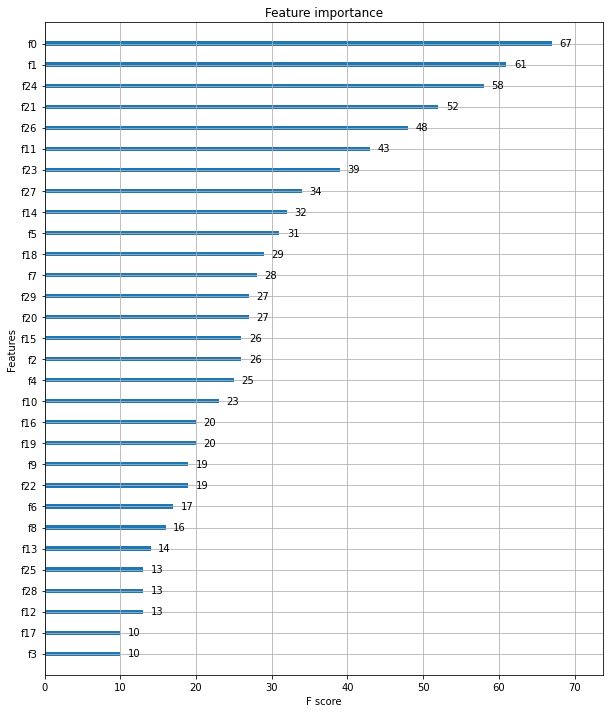

In [128]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax);

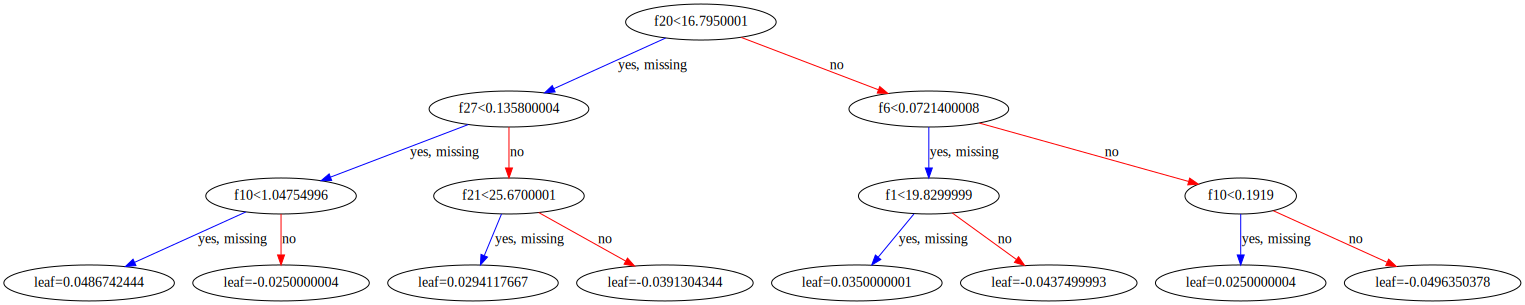

In [129]:
dot_data = xgb.to_graphviz(xgb_model)
graph = graphviz.Source(dot_data)
graph

## XGB 분류

IRIS

In [130]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, random_state=123)

In [131]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:, 1]

In [132]:
cross_val = cross_validate(
    estimator=xgbc,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time : {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.05884957313537598
avg score time : 0.0011264324188232423
avg test score : 0.96


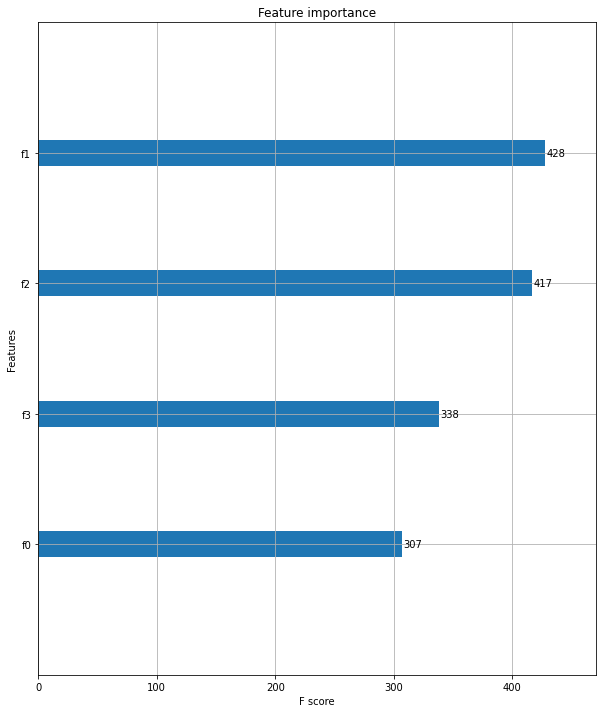

In [133]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax);

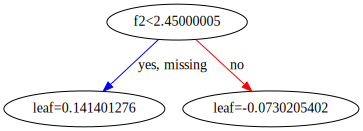

In [134]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

### XGB 회귀

Boston

In [135]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, 
                                                    test_size=0.2, random_state=123)

In [136]:
xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3,
                    objective='reg:squarederror')
xgbr.fit(X_train, y_train)
preds = xgbr.predict(X_test)

In [137]:
cross_val = cross_validate(
    estimator=xgbr,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time : {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.16100292205810546
avg score time : 0.002480316162109375
avg test score : 0.6884390572208088


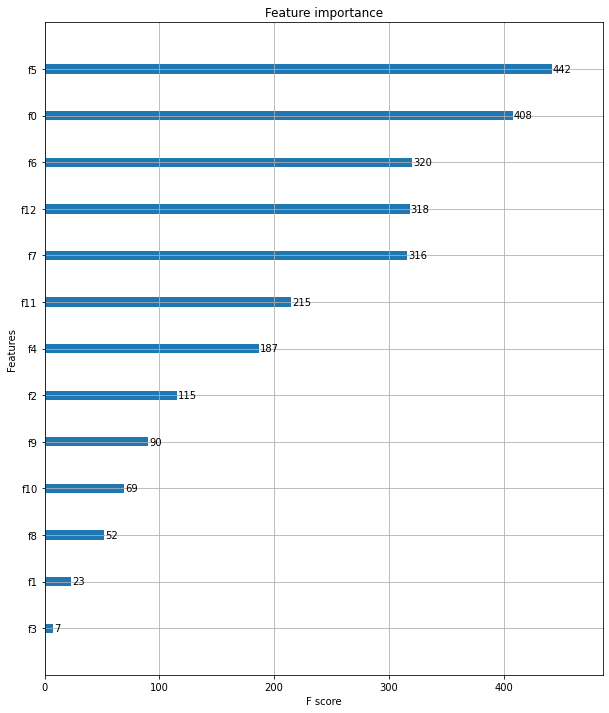

In [138]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbr, ax=ax);

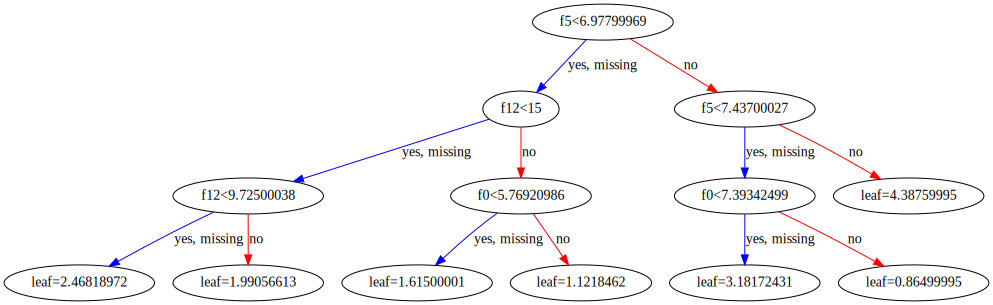

In [139]:
dot_data = xgb.to_graphviz(xgbr)
graph = graphviz.Source(dot_data)
graph

# LightGBM
- 더 빠른 학습과 예측시간
- 더 적은 메모리 사용
- 범주형 특징의 자동 변환과 최적 분할

In [140]:
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

## LGBMClassifier

In [141]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2, random_state=123)

In [142]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbmc.predict(X_test)

[1]	valid_0's binary_logloss: 0.575665	valid_0's binary_logloss: 0.575665
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.513919	valid_0's binary_logloss: 0.513919
[3]	valid_0's binary_logloss: 0.463418	valid_0's binary_logloss: 0.463418
[4]	valid_0's binary_logloss: 0.420506	valid_0's binary_logloss: 0.420506
[5]	valid_0's binary_logloss: 0.383753	valid_0's binary_logloss: 0.383753
[6]	valid_0's binary_logloss: 0.352228	valid_0's binary_logloss: 0.352228
[7]	valid_0's binary_logloss: 0.326437	valid_0's binary_logloss: 0.326437
[8]	valid_0's binary_logloss: 0.302562	valid_0's binary_logloss: 0.302562
[9]	valid_0's binary_logloss: 0.278182	valid_0's binary_logloss: 0.278182
[10]	valid_0's binary_logloss: 0.261933	valid_0's binary_logloss: 0.261933
[11]	valid_0's binary_logloss: 0.245115	valid_0's binary_logloss: 0.245115
[12]	valid_0's binary_logloss: 0.228615	valid_0's binary_logloss: 0.228615
[13]	valid_0's binary_logloss: 0.215537	valid_

In [143]:
cross_val = cross_validate(
    estimator=lgbmc,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time : {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.25210933685302733
avg score time : 0.002844715118408203
avg test score : 0.9701288619779536


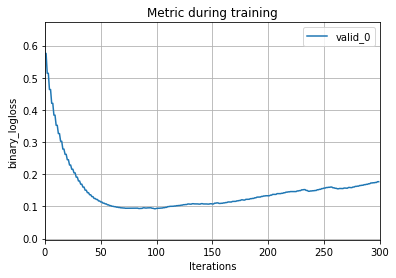

In [144]:
plot_metric(lgbmc)

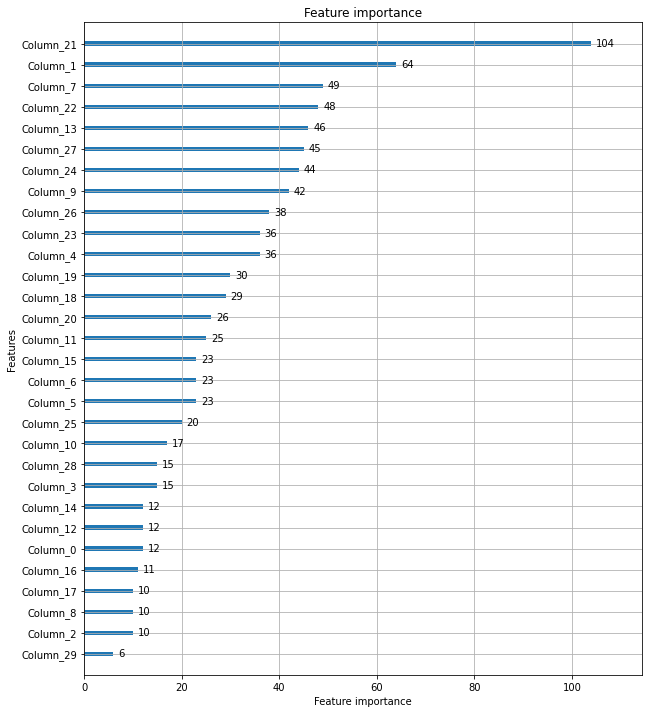

In [145]:
plot_importance(lgbmc, figsize=(10, 12))

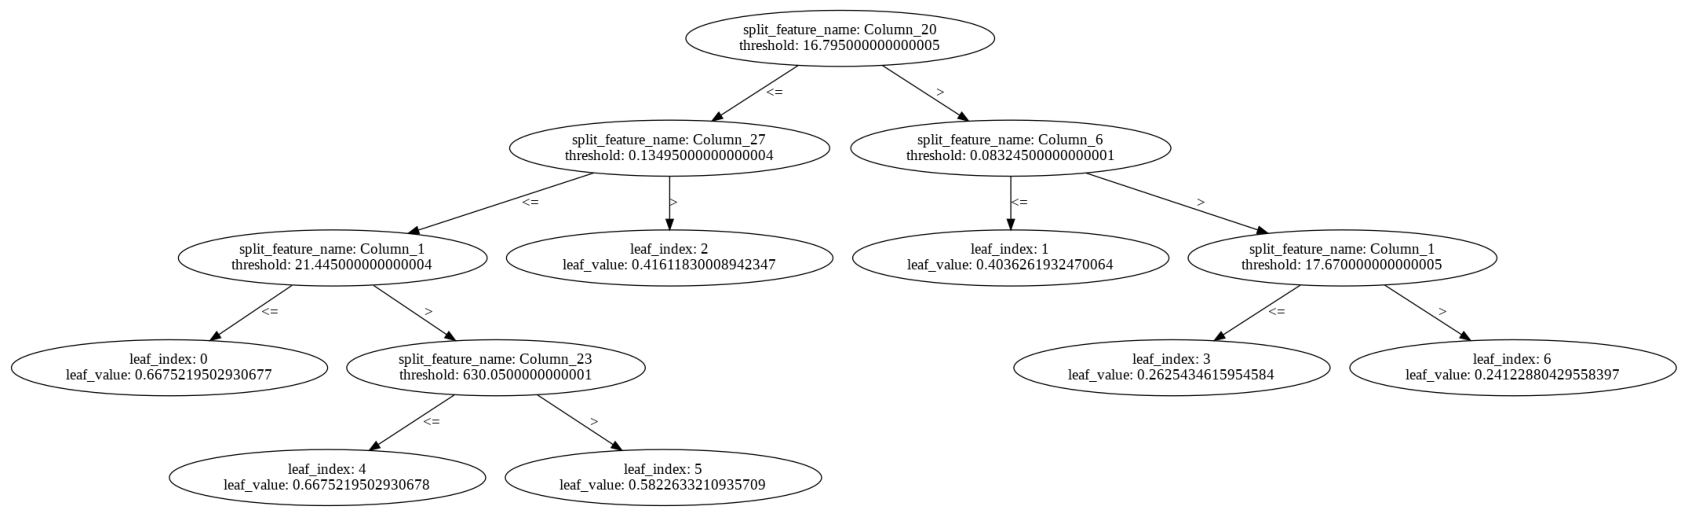

In [146]:
plot_tree(lgbmc, figsize=(30, 40));

## LGBM 회귀

In [147]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, 
                                                    test_size=0.2, random_state=123)

In [149]:
lgbmr = LGBMRegressor(n_estimators=400)
evals = [(X_test, y_test)]
lgbmr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbmr.predict(X_test)

[1]	valid_0's l2: 5692.17
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 5218.79
[3]	valid_0's l2: 4835.34
[4]	valid_0's l2: 4479.84
[5]	valid_0's l2: 4183.42
[6]	valid_0's l2: 3924.35
[7]	valid_0's l2: 3726.96
[8]	valid_0's l2: 3555.3
[9]	valid_0's l2: 3407.95
[10]	valid_0's l2: 3291.33
[11]	valid_0's l2: 3201.78
[12]	valid_0's l2: 3114.69
[13]	valid_0's l2: 3059.18
[14]	valid_0's l2: 3005.79
[15]	valid_0's l2: 2945.18
[16]	valid_0's l2: 2876.37
[17]	valid_0's l2: 2822.71
[18]	valid_0's l2: 2791.31
[19]	valid_0's l2: 2786.39
[20]	valid_0's l2: 2745.25
[21]	valid_0's l2: 2724.07
[22]	valid_0's l2: 2705.17
[23]	valid_0's l2: 2685.41
[24]	valid_0's l2: 2663.2
[25]	valid_0's l2: 2659.75
[26]	valid_0's l2: 2636.48
[27]	valid_0's l2: 2615.15
[28]	valid_0's l2: 2640.63
[29]	valid_0's l2: 2624.73
[30]	valid_0's l2: 2615.14
[31]	valid_0's l2: 2601.41
[32]	valid_0's l2: 2593.79
[33]	valid_0's l2: 2555.64
[34]	valid_0's l2: 2572.12
[35]	valid_0's l2: 2581.22
[36

In [150]:
cross_val = cross_validate(
    estimator=lgbmr,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time : {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.13425827026367188
avg score time : 0.004003763198852539
avg test score : 0.30867643947179507


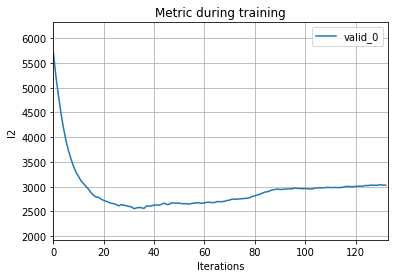

In [151]:
plot_metric(lgbmr)

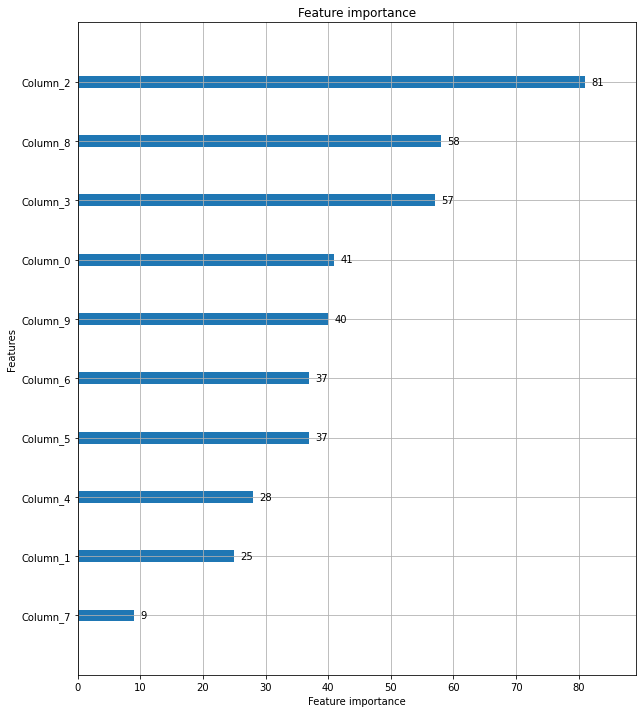

In [153]:
plot_importance(lgbmr, figsize=(10, 12))

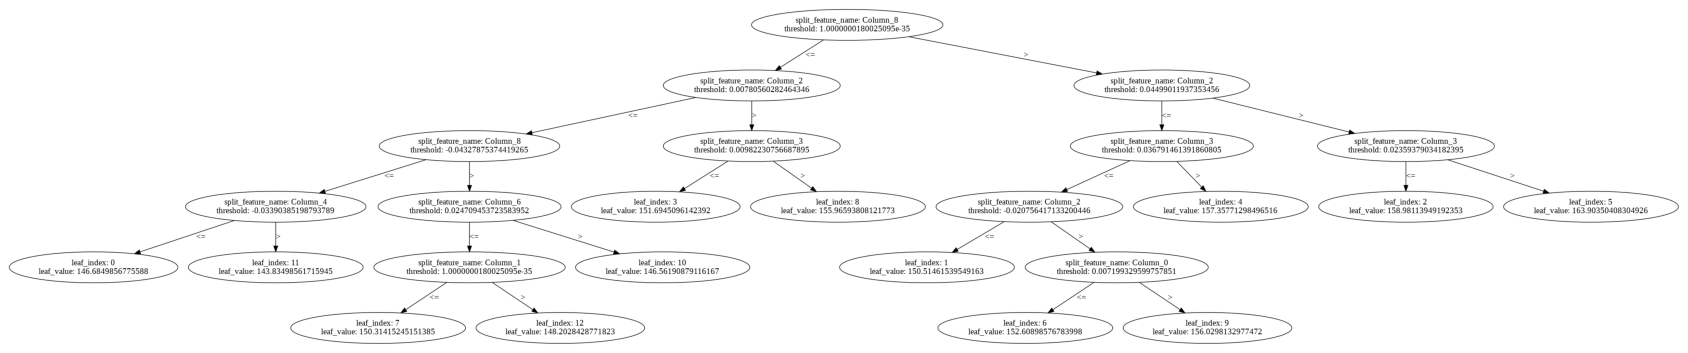

In [152]:
plot_tree(lgbmr, figsize=(30, 40));